In [1]:
import tweepy
from decouple import config

In [2]:
TWITTER_AUTH = tweepy.OAuthHandler(config('TWITTER_CONSUMER_KEY'),config('TWITTER_CONSUMER_SECRET'))

TWITTER_AUTH.set_access_token(config('TWITTER_ACCESS_TOKEN'),config('TWITTER_ACCESS_TOKEN_SECRET'))

TWITTER = tweepy.API(TWITTER_AUTH)

In [3]:
import re
from collections import Counter

In [95]:
def get_first_user_interactions(search):
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
                count=1000,
                exclude_replies=False,
                include_rts=True,
                tweet_mode='extended'
    )
    b = [ i.full_text for i in tweets ]
    b = " ".join(b)
    b = b.lower()
    b = b.replace(search, "")
    interactions = re.findall(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',b)
    #counter returns an object with a count for each account
    return Counter(interactions).most_common(10)


In [96]:
a = get_first_user_interactions("webdevmason")

In [97]:
#first = Counter(a).most_common(10)

In [98]:
first

[(('kevinsimler', 19), 1),
 (('skepticalalpaca', 13), 1),
 (('austen', 11), 1),
 (('joefyhrceesay', 11), 1),
 (('visakanv', 10), 1),
 (('halvorz', 10), 1),
 (('spakhm', 9), 1),
 (('paulg', 8), 1),
 (('homsit', 8), 1),
 (('jonathan_blow', 7), 1)]

In [8]:
def get_first_user_connections(search):
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
                count=1000,
                exclude_replies=False,
                include_rts=True,
                tweet_mode='extended'
    )
    b = [ i.full_text for i in tweets ]
    b = " ".join(b)
    b = b.lower()
    b = b.replace(search, "")
    interactions = re.findall(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',b)
    interactions = " ".join(interactions)
    interactions_list.append(interactions)
    index.append(search)
    return interactions

In [9]:
type(first)

NameError: name 'first' is not defined

In [10]:
%%time
interactions_list = []
index = []
get_first_user_connections("webdevmason")
for i in range(len(a)):
    get_first_user_connections(a[i][0])

CPU times: user 921 ms, sys: 91.3 ms, total: 1.01 s
Wall time: 11 s


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = interactions_list
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(corpus)

In [12]:
import pandas as pd
display_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=index)

In [13]:
display_df

,aelkus,altimor,amasad,andrewdixonso,andy_matuschak,andyh2,artirkel,austen,awilkinson,beherebaba,...,trevmckendrick,tristanharris,trumwill,tylercowen,typesfast,udayrsingh,vgr,visakanv,walkerdavide,webdevmason
webdevmason,0,0,0,0,5,1,1,11,0,0,...,1,5,0,0,0,0,0,10,0,0
kevinsimler,0,5,4,0,0,0,5,0,0,0,...,0,0,0,0,0,0,6,4,1,6
skepticalalpaca,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
austen,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,4
joefyhrceesay,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
visakanv,0,1,2,1,0,0,0,2,0,0,...,0,0,0,0,0,1,14,0,1,2
halvorz,3,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
spakhm,0,0,0,0,1,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,9
paulg,0,1,4,0,0,0,0,11,0,0,...,0,0,0,2,2,1,0,0,0,3
homsit,0,9,0,0,0,0,0,4,1,1,...,1,0,0,1,1,0,0,0,0,12


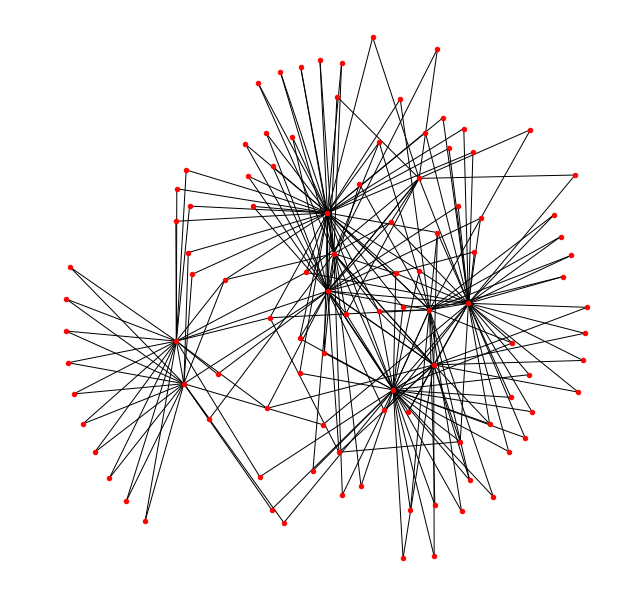

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
DG=nx.MultiGraph()

#loop through index, then the columns to find non-zero connections.
for i in display_df.index.values:
    for j in display_df.columns:
        if display_df[j].loc[i] >0 :
            DG.add_edge(j,i,display_df[j].loc[i] )
        else:
            pass
        
fig = plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(DG,node_size=20)
plt.show()

## Matrix Multiplication
Really don't need the graph library 

In [92]:
x2 = X @ X.T
pd.DataFrame(x2.toarray(), columns = index, index = index)

,webdevmason,kevinsimler,skepticalalpaca,austen,joefyhrceesay,visakanv,halvorz,spakhm,paulg,homsit,jonathan_blow
webdevmason,1056,123,153,50,11,49,0,306,189,146,9
kevinsimler,123,659,203,32,81,126,67,129,63,179,27
skepticalalpaca,153,203,1294,31,66,15,256,70,22,85,16
austen,50,32,31,1584,37,14,0,77,71,117,8
joefyhrceesay,11,81,66,37,92,2,0,104,39,114,18
visakanv,49,126,15,14,2,293,15,43,39,50,7
halvorz,0,67,256,0,0,15,147,0,9,4,0
spakhm,306,129,70,77,104,43,0,425,107,197,31
paulg,189,63,22,71,39,39,9,107,250,146,9
homsit,146,179,85,117,114,50,4,197,146,819,84
